In [44]:
from collections import Counter, OrderedDict

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [3]:
WORKLOAD_PATH = '../workloads/w1.txt'

In [4]:
start = []
active = []
idle = []

prev_idle = 0

with open(WORKLOAD_PATH) as w_file:
    for line in w_file.readlines():
        s, a = (int(n) for n in line.split())

        idle.append(s-prev_idle)
        prev_idle = s+a

In [5]:
idle1 = [0,3,3,4,119970,3,120012,3,4,3,3,3,4,3,119993,1,2,3,119910,3,4,3,4,119901,3,3,3,4,4,3,4,119892,2,4,4,3,3,4,119872,2,119917,1,1,1,1,1,1,3,119956,4,4,4,3,4,3,4]
idle2 = [994,119998,84,98,82,96,90,98,100,84,95,92,119983,89,98,92,96,93,96,93,96,93,97,119982,93,96,91,97,106,78,111,77,96,95,119975,93,98,100,84,99,84,98,92,95,94,119988,108,80,97,90,97,93,94,92,99,105,119978,103,83,98,91,94,91,95,91,94,105,119984,103,83,93,99,85,101,83,102,84,118,119989,86,98,103,84,86,92,94,111,73,103,119982,90,95,90,109,78,94,96,86,104]
idle = idle1

In [92]:
def plot_count(arr, thr):
    counter = {}

    counter = Counter((v for v in arr if v < thr))
    counter = {str(k): counter[k] for k in sorted(counter.keys())}
    counter[f'>>'] = len([v for v in arr if v > thr])

    plt.bar(counter.keys(), counter.values())

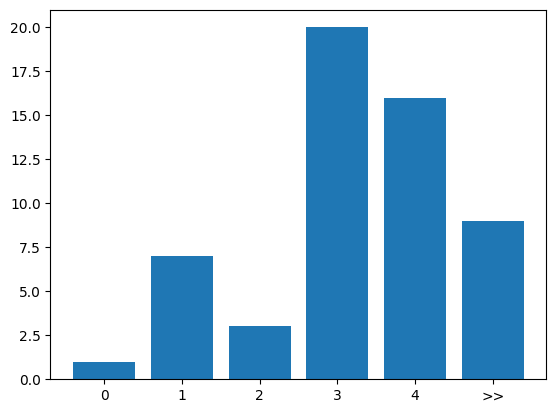

In [93]:
plot_count(idle1, 5)
plt.savefig(f'../build/w1_hist.png')

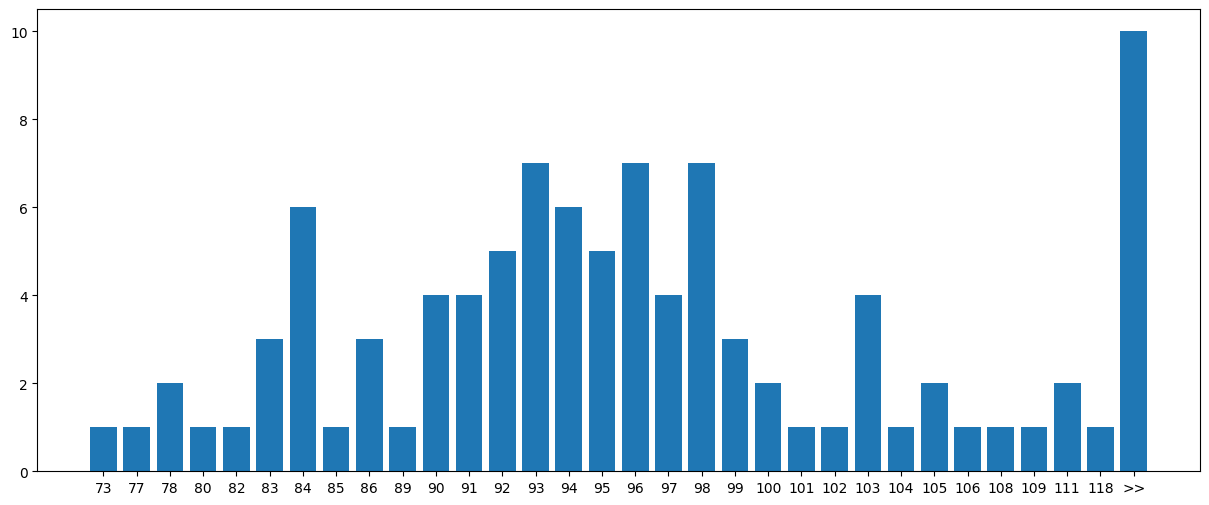

In [94]:
plt.figure(figsize=(15,6))
plot_count(idle2, 200)
plt.savefig(f'../build/w2_hist.png')

In [ ]:
df = pd.DataFrame()
df['current'] = idle

df.head()

,current
0,0
1,3
2,3
3,4
4,119970


In [ ]:
PREV_WINDOW = 7
shifted = idle

for i in range(PREV_WINDOW):
    shifted = np.roll(shifted,1)
    shifted[0] = 0

    df[f'curr - {i+1}'] = shifted

df['current'] = 1*(df['current'] >= 5)
df.head(20)

,current,curr - 1,curr - 2,curr - 3,curr - 4,curr - 5,curr - 6,curr - 7
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0
3,0,3,3,0,0,0,0,0
4,1,4,3,3,0,0,0,0
5,0,119970,4,3,3,0,0,0
6,1,3,119970,4,3,3,0,0
7,0,120012,3,119970,4,3,3,0
8,0,3,120012,3,119970,4,3,3
9,0,4,3,120012,3,119970,4,3


In [ ]:
x = df.drop(columns=['current'])
y = df['current']

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
score = model.score(x, y)

In [ ]:

print("Coefficients:", model.coef_)
#print("Intercept:", model.intercept_)

# Optionally, print predictions
#print("Predictions:", y_pred)
print("R^2 Score:", score)

Coefficients: [-2.51976801e-06 -7.40035590e-07 -2.44451671e-06 -1.81422707e-06
 -1.33639860e-06 -2.75190858e-06 -1.94022431e-06]
R^2 Score: 0.20679421729154457


In [ ]:
model = RandomForestRegressor(n_estimators=1000, random_state=42, max_depth=None)
model.fit(x, y)

y_pred = model.predict(x)
score = model.score(x, y)

In [ ]:

#print("Coefficients:", model.coef_)
#print("Intercept:", model.intercept_)

# Optionally, print predictions
#print('original', y)
print("Predictions:", y_pred)
print("R^2 Score:", score)

Predictions: [0.008 0.008 0.1   0.134 0.666 0.175 0.709 0.09  0.116 0.08  0.201 0.062
 0.076 0.104 0.677 0.149 0.182 0.061 0.724 0.059 0.146 0.121 0.094 0.69
 0.055 0.078 0.119 0.055 0.127 0.092 0.148 0.67  0.036 0.147 0.068 0.041
 0.092 0.046 0.681 0.09  0.698 0.034 0.02  0.021 0.034 0.158 0.116 0.122
 0.647 0.175 0.2   0.085 0.145 0.124 0.099 0.061]
R^2 Score: 0.8068397163120568
